In [1]:
%run ../../utils/commonImports.py
%run ../../utils/tradingImports.py
%matplotlib inline

# Load Data

In [3]:
featuresRoot = 'D:\\Dropbox\\My work\\krypl-project\\dataFeatures'
fileName = 'return-01-loss-max-01-within-day-droped-na.tsv'
featuresFile = f'{featuresRoot}\\{fileName}'
featured = read_tsv(featuresFile).dropna()

In [4]:
featured.head()

,date,timestamp,label,open,high,low,close,return,return_1,return_2,...,ma_36_288,ac36,ac288,zscore_36_volume,zscore_288_volume,zscore_2016_volume,vol36,vol288,vol2016,dv_36_288
0,2017-01-09 23:50:00,1484002200,True,903.4000,904.0000,899.0486,904.0000,0.0055,-0.0016,-0.0000,...,0.4935,0.6778,-0.7486,0.1824,-0.0727,-0.3535,-0.8299,-1.8236,-0.0318,-1.8605
1,2017-01-09 23:55:00,1484002500,True,903.7359,903.9400,900.4889,900.4999,-0.0039,0.0055,-0.0016,...,0.5310,0.6949,-0.7415,0.1656,-0.0712,-0.3525,-0.7021,-1.7942,-0.0045,-1.8305
2,2017-01-10 00:00:00,1484002800,True,901.2000,901.2000,901.2000,901.2000,0.0008,-0.0039,0.0055,...,0.5369,0.7068,-0.7346,-0.5773,-0.3597,-0.4858,-0.7118,-1.7884,-0.0553,-1.8208
3,2017-01-10 00:05:00,1484003100,True,902.6899,903.7000,902.4510,902.4510,0.0014,0.0008,-0.0039,...,0.5528,0.7158,-0.7265,-0.3356,-0.2742,-0.4462,-0.7137,-1.7820,-0.0627,-1.8106
4,2017-01-10 00:10:00,1484003400,True,902.4510,903.7099,901.2000,903.7000,0.0014,0.0014,0.0008,...,0.5965,0.7079,-0.7171,1.0315,0.2534,-0.2029,-0.8363,-1.7826,-0.0798,-1.8065


In [5]:
drop_cols = ['date', 'timestamp', 'label', 'open', 'high', 'low', 'close']
X = featured
for col in drop_cols:
    X = X.drop(col, axis=1)
y = featured['label'].apply(int)

# Test Train Validation Split

In [6]:
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.33)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.33)

Text(0.5,1,'Test Distribution')

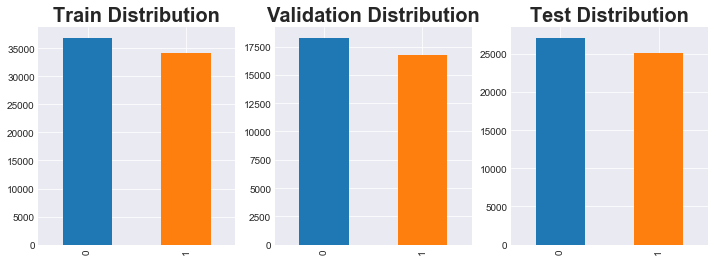

In [7]:
fig, axes = plt.subplots(1, 3, figsize=[12, 4])
y_train.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Train Distribution', fontproperties=title_font)
y_val.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Validation Distribution', fontproperties=title_font)
y_test.value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Test Distribution', fontproperties=title_font)

In [9]:
def write_split(root):
    write_tsv(X_train, f"{root}/X_train.tsv")
    write_tsv(y_train, f"{root}/y_train.tsv")
    write_tsv(X_val, f"{root}/X_val.tsv")
    write_tsv(y_val, f"{root}/y_val.tsv")
    write_tsv(X_test, f"{root}/X_test.tsv")
    write_tsv(y_test, f"{root}/y_test.tsv")
    
write_split("D:\\Dropbox\\My work\\krypl-project\\dataSplit\\return-01-loss-01-within-day")